**Evaluation Setup**

In [15]:
import torch
import torch.nn.functional as F
from unet import MultiModalSegModel
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



In [16]:
# ------------------- Load Model -------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiModalSegModel().to(device)
checkpoint_path = "../checkpoints/demo1_multimodal_unet (1).pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()
print("Model loaded and set to eval mode.")

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
/var/folders/4s/yjypxhqx3p76rqc_v19d

Model loaded and set to eval mode.


**Preprocess Data For Inference**

In [17]:
# ------------------- Preprocess Input -------------------
def load_and_preprocess(png_path):
    img = Image.open(png_path).convert('L')
    img_np = np.array(img).astype(np.float32) / 255.0
    return torch.from_numpy(img_np)[None,None]  # (1,1,H,W)

t1c = load_and_preprocess('../data/t1c_slice.jpeg').to(device)
t1n = load_and_preprocess('../data/t1n_slice.jpeg').to(device)
t2f = load_and_preprocess('../data/t2f_slice.jpeg').to(device)
t2w = load_and_preprocess('../data/t2w_slice.jpeg').to(device)

inputs = {'t1c':t1c, 't1n':t1n, 't2f':t2f, 't2w':t2w}

**Running Inference for "T1C"**

*Highlights actively growing tumor regions (Enhancing Tumor Core)*

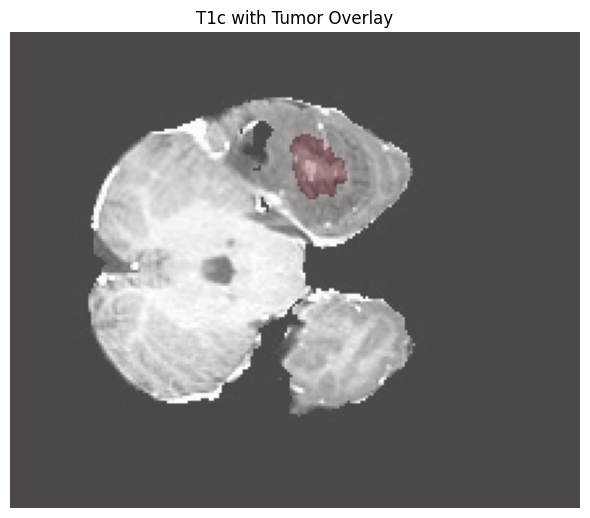

In [18]:
# ------------------- Inference -------------------
with torch.no_grad():
    out = model(inputs)['t1c']                      # pick modality
    out = F.interpolate(out, size=t1c.shape[-2:],   # match size
                        mode='bilinear',
                        align_corners=False)
    mask = (torch.sigmoid(out)>0.5)[0,0].cpu().numpy()

img = t1c[0,0].cpu().numpy()

# ------------------- Overlay Visualization -------------------
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray', origin='lower')
# use a soft red overlay
plt.imshow(mask, cmap='Reds', alpha=0.3, origin='lower')
plt.title("T1c with Tumor Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()

**Running Inference for "T1N"**

*Highlights general anatomical structure of the brain*

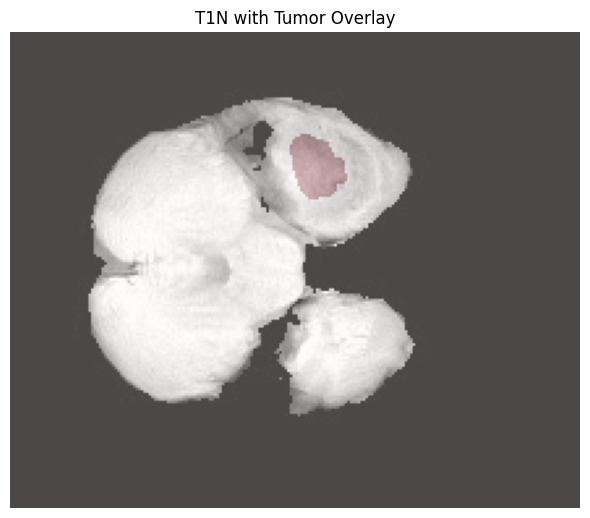

In [19]:
# ------------------- Inference -------------------
with torch.no_grad():
    out = model(inputs)['t1n']                      # pick modality
    out = F.interpolate(out, size=t1n.shape[-2:],   # match size
                        mode='bilinear',
                        align_corners=False)
    mask = (torch.sigmoid(out)>0.5)[0,0].cpu().numpy()

img = t1n[0,0].cpu().numpy()

# ------------------- Overlay Visualization -------------------
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray', origin='lower')
# use a soft red overlay
plt.imshow(mask, cmap='Reds', alpha=0.3, origin='lower')
plt.title("T1N with Tumor Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()

**Running Inference for "T2W"**

*Highlights fluid filled regions including edema, necrosis, and cystic components of the tumor*


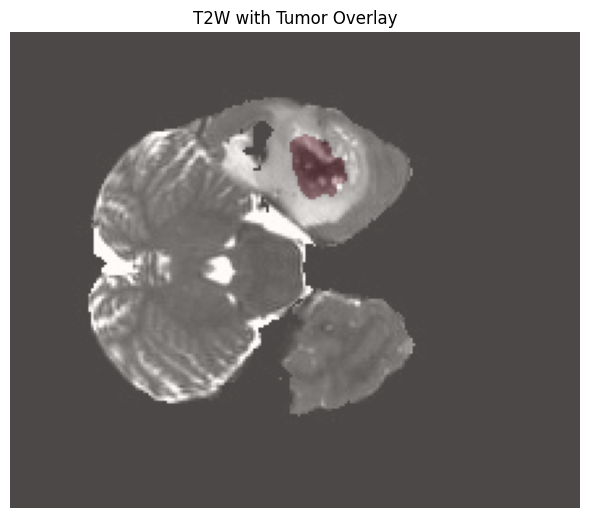

In [20]:
# ------------------- Inference -------------------
with torch.no_grad():
    out = model(inputs)['t2w']                      # pick modality
    out = F.interpolate(out, size=t2w.shape[-2:],   # match size
                        mode='bilinear',
                        align_corners=False)
    mask = (torch.sigmoid(out)>0.5)[0,0].cpu().numpy()

img = t2w[0,0].cpu().numpy()

# ------------------- Overlay Visualization -------------------
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray', origin='lower')
# use a soft red overlay
plt.imshow(mask, cmap='Reds', alpha=0.3, origin='lower')
plt.title("T2W with Tumor Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()

**Running Inference for "T2F"**

*Highlights Edema and infiltrative tumor regions while suppressing cerebrospinal fluid (CSF)*

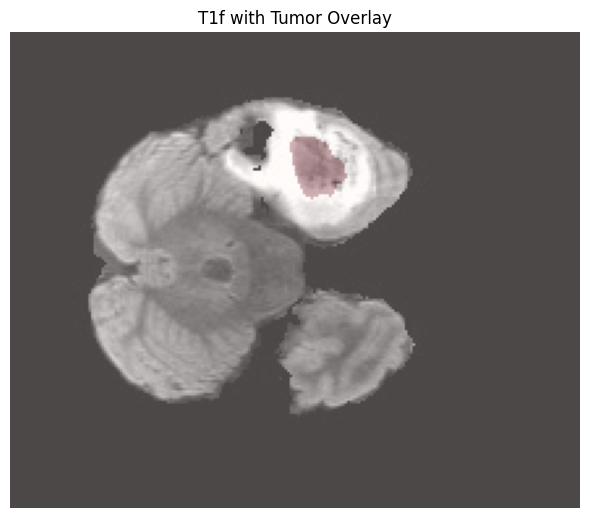

In [21]:
# ------------------- Inference -------------------
with torch.no_grad():
    out = model(inputs)['t2f']                      # pick modality
    out = F.interpolate(out, size=t2f.shape[-2:],   # match size
                        mode='bilinear',
                        align_corners=False)
    mask = (torch.sigmoid(out)>0.5)[0,0].cpu().numpy()

img = t2f[0,0].cpu().numpy()

# ------------------- Overlay Visualization -------------------
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray', origin='lower')
# use a soft red overlay
plt.imshow(mask, cmap='Reds', alpha=0.3, origin='lower')
plt.title("T1f with Tumor Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()

**Next Steps**
- Continue Working on Refining Combined Fusion Output
- Continue Working on Edema, and Necrotic Region